By analysing the Titanic passenger dataset, this piece of work is going to look into the chances of survival in respect of passenger's age, class and fare paid, and then investigate the correlation between chance of survival and these attributes.

In [74]:
import pandas as pd
df = pd.read_csv('U:/ManW10/Downloads/train.csv', header=0)

In [75]:
#Extract info to be analysed
df = df.drop(['Sex'], axis=1)
df = df.drop(['SibSp'], axis=1)
df = df.drop(['Parch'], axis=1)
df = df.drop(['Ticket'], axis=1)
df = df.drop(['Cabin'], axis=1)
df = df.drop(['Embarked'], axis=1)
df = df.drop(['Name'], axis=1)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            714 non-null float64
Fare           891 non-null float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


Firstly the attribute Age will be considered.

In [77]:
#percentage of null values in Age attribute
a = (891-714)/891
print(a)

0.19865319865319866


Since nearly 20% of the age information of the passengers is missing which is a considerable percentage, it is assumed that the age and possibility of survival are distributed in a similar behavior to the rest of the whole group. Therefore, in this case, only the 80% of the passengers' infomation is looked into.

In [78]:
#get the range of ages
print(df['Age'].max(),df['Age'].min())

80.0 0.42


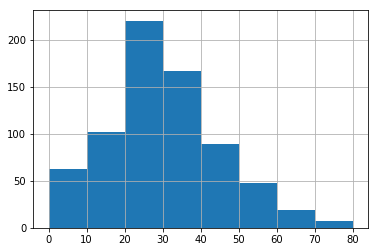

In [79]:
#looking into the age distribution of passengers
%matplotlib inline
import pylab as P

df['Age'].hist(bins=8, range=(0,80))

From the histogram presented here, the number of passengers increases to more than 200 for the range 20-30 and then drop gradually while the age value increases.

In [80]:
#divide the group with non-null age information into 8 groups i.e. 0-10,10-20 ...... 70-80
mask = [df.Age<10,
        (df['Age']>=10) & (df['Age']<20),
        (df['Age']>=20) & (df['Age']<30),
        (df['Age']>=30) & (df['Age']<40),
        (df['Age']>=40) & (df['Age']<50),
        (df['Age']>=50) & (df['Age']<60),
        (df['Age']>=60) & (df['Age']<70),
        (df['Age']>=70) & (df['Age']<=80)]

#number of passengers in each age group
N_p = []

#number of survivals in each age group
N_s = []

#the survival rate of each group.
S_r = []

for i in range(len(mask)):
    n_p = df[mask[i]]['Survived'].value_counts().sum()
    n_s = df[mask[i]]['Survived'].value_counts()[1]
    s_r = n_s / n_p
    s_r = int(s_r * 100)
    N_p.append(n_p)
    N_s.append(n_s)
    S_r.append(s_r)

#present these values in a table
df2 = pd.DataFrame({'Age range':['0-10','10-20','20-30','30-40','40,50','50-60','60-70','70-80'],
                   'Number of passengers':N_p,'Number of survivals':N_s,'Survival rate/%':S_r})
print(df2)

  Age range  Number of passengers  Number of survivals  Survival rate/%
0      0-10                    62                   38               61
1     10-20                   102                   41               40
2     20-30                   220                   77               35
3     30-40                   167                   73               43
4     40,50                    89                   34               38
5     50-60                    48                   20               41
6     60-70                    19                    6               31
7     70-80                     7                    1               14


In [81]:
#survival rate of all passengers considered 
s_r_all = sum(N_s)/sum(N_p) * 100
print(int(s_r_all))

40


From the table above, it can be seen that children i.e. passengers in ages ranging from 0 to 10 has the highest survival rate as much as 61% which is more than a half while the 70-80 age group the lowest with value 14%. Although the 20-30 group has got the largest number of survival, its survival rate is lower than the rate overall i.e. 40%. In comparison with that, the rate of 30-40, 40%, is higher than the overall rate and is the second highest. 

The lowest two survival rates drop on groups 60-70 and 70-80,indicating that a higher age might not be an advantegeous attribute for survival.

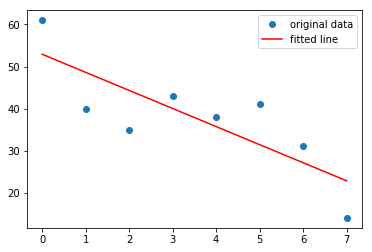

In [82]:
#plot the scattered survival rate against age groups and generate a best-fit line for these data
#ref:https://plot.ly/matplotlib/linear-fits/

# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

#represent the age groups with numbers from 0 to 8, meaning 0-10, 10-20,20-30 ect.
xi = arange(0,8)
A = array([ xi, ones(8)])

# y-axis represents the survival rate of the corresponding age group
y = S_r

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi, y, 'o', label='original data')
plt.plot(xi, intercept + slope*xi, 'r', label='fitted line')
plt.legend()
plt.show()

In the graph above, a declined line shows a decreasing trend as the order of age groups goes up. 

In [83]:
#Evaluate the goodness-of-fit of this line
print((r_value)**2)

0.64596251741


Although the r-squared value is higher than 0.5, by inspection the gap between the scattered points and the best-fit-line is quite wide. Hence it could be concluded that this line is a good prediction of the decreasing trend of survival rate as the ages of passengers go up but not very decent for numerical predictions.

The next attribute to investigate is the passenger's class.

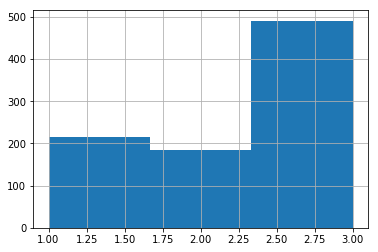

In [84]:
df['Pclass'].hist(bins=3, range=(1,3))

The histogram above shows that the 3rd class accommodate the largest number of people which is a bit less than 500, while the other two classes hold around 200 passengers each. The number of passengers in the 1st class is slightly higher than the 2nd.
The next step is to look at the survival rate of each class. Since the data for this attribute is complete. All passengers are considered in this case.

In [85]:
#divide all the passengers with their class of ticket
mask2 = [df.Pclass==1, df.Pclass==2,df.Pclass==3]

#number of passengers in each class
N_p_c = []

#number of survivals in each age group
N_s_c = []

#the survival rate of each group.
S_r_c = []

for i in range(len(mask2)):
    n_p = df[mask2[i]]['Survived'].value_counts().sum()
    n_s = df[mask2[i]]['Survived'].value_counts()[1]
    s_r = n_s / n_p
    s_r = int(s_r * 100)
    N_p_c.append(n_p)
    N_s_c.append(n_s)
    S_r_c.append(s_r)

#present these values in a table
df3 = pd.DataFrame({'Pclass':['1','2','3'],
                   'Number of passengers':N_p_c,'Number of survivals':N_s_c,'Survival rate/%':S_r_c})
print(df3)

   Number of passengers  Number of survivals Pclass  Survival rate/%
0                   216                  136      1               62
1                   184                   87      2               47
2                   491                  119      3               24


The table above shows that the survival rate of the 1st class passengers is the highest and this applies to its number of survivals as well, although only a quater of passengers hold 1st class tickets. Around half of passengers in 2dn class and a quater on the 3rd class survived.

By inspection of the figures, no linear relationship between the class and the survival rate is spotted. Therefore it is concluded here that the survival rate declines as the order of class increases,

The last attribute to look at here is the fares paid by passengers.

In [86]:
#get the range of fare
print(df['Fare'].max(),df['Fare'].min())

512.3292 0.0


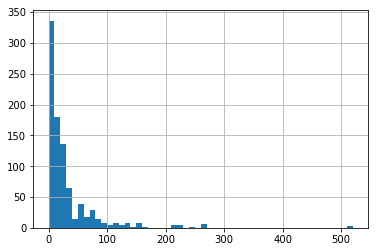

In [87]:
df['Fare'].hist(bins=52, range=(0,520))

This histogram shows that majority of the passengers paid fares with amounts ranging from 0 to 100. More than 330 passengers paid fare 0-10. 

Same as the case of attribute age, considering the wide range of fare amount and the gap between the last two bins, the passengers are not divided into groups of evenly distributed numbers.

In [88]:
#divide all the passengers with fares paid
mask3 = [df.Fare<10,
        (df['Fare']>=10) & (df['Fare']<20),
        (df['Fare']>=20) & (df['Fare']<30),
        (df['Fare']>=30) & (df['Fare']<40),
        (df['Fare']>=40) & (df['Fare']<50),
        (df['Fare']>=50) & (df['Fare']<60),
        (df['Fare']>=60) & (df['Fare']<70),
        (df['Fare']>=70) & (df['Fare']<80),
        (df['Fare']>=80) & (df['Fare']<90),
        (df['Fare']>=90) & (df['Fare']<100),
        (df['Fare']>=100) & (df['Fare']<200),
        (df['Fare']>=200) & (df['Fare']<520)]

#number of passengers in each class
N_p_f = []

#number of survivals in each age group
N_s_f = []

#the survival rate of each group.
S_r_f = []

for i in range(len(mask3)):
    n_p = df[mask3[i]]['Survived'].value_counts().sum()
    n_s = df[mask3[i]]['Survived'].value_counts()[1]
    s_r = n_s / n_p
    s_r = int(s_r * 100)
    N_p_f.append(n_p)
    N_s_f.append(n_s)
    S_r_f.append(s_r)

#present these values in a table
df4 = pd.DataFrame({'Fare':['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-200','200-520'],
                   'Number of passengers':N_p_f,'Number of survivals':N_s_f,'Survival rate/%':S_r_f})
print(df4)

       Fare  Number of passengers  Number of survivals  Survival rate/%
0      0-10                   336                   67               19
1     10-20                   179                   76               42
2     20-30                   136                   58               42
3     30-40                    64                   28               43
4     40-50                    15                    4               26
5     50-60                    39                   27               69
6     60-70                    17                    6               35
7     70-80                    29                   17               58
8     80-90                    15                   13               86
9    90-100                     8                    7               87
10  100-200                    33                   25               75
11  200-520                    20                   14               70


Although the survival rate is not the highest (76%), the group with fare paid amount of 10-20 has the largest number of survivals. In spite of the second highest number of survivals, the group who paid the least fare i.e. 0-10 has the lowest survival rate as much as 67%. Group 50-60 has got the highest survival rate of 69% despite the amount of survivals doesnot really stand out.

Below is the figure of the scattered data and the best-fit line.

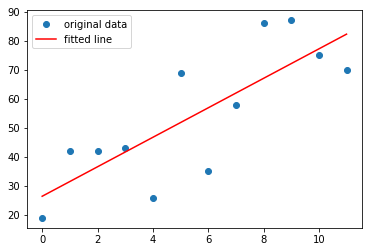

In [89]:
#represent the fare groups with numbers from 0 to 12, meaning 0-10, 10-20,20-30 ect.
xi = arange(0,12)
A = array([ xi, ones(12)])

# y-axis represents the survival rate of the corresponding fare group
y = S_r_f

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi, y, 'o', label='original data')
plt.plot(xi, intercept + slope*xi, 'r', label='fitted line')
plt.legend()
plt.show()

In [90]:
#goodness-of-fit
print((r_value)**2)

0.630624379624


Similar to the case of age, whilst the r-squared value is larger than 0.5, the line in this figure is only good enough for qualitive prediction but not for quantative, considering the gap between the observed results and the corresponding predicted results on the line.

By investigating three attributes of passengers onboard Titanic, it is found that the survival rate drops while the age of passengers and order of class increase, and that it increases as the fares paid go up. A higher age might not be advantegeous for survival.

Two lines of best-fit are generate to give qualitative prediction of survival rate based on age and fare, and neither of them is good enough for quantative predictions.